In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
products = pd.read_csv(r'C:\Users\Chethana\Downloads\Products.csv')
customers = pd.read_csv(r'C:\Users\Chethana\Downloads\Customers.csv')
transactions = pd.read_csv(r'C:\Users\Chethana\Downloads\Transactions.csv')

In [2]:
# Display the first rows of each dataset
products_info = products.head()
customers_info = customers.head()
transactions_info = transactions.head()


In [3]:
products_info 

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
customers_info

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
transactions_info

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [7]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [8]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


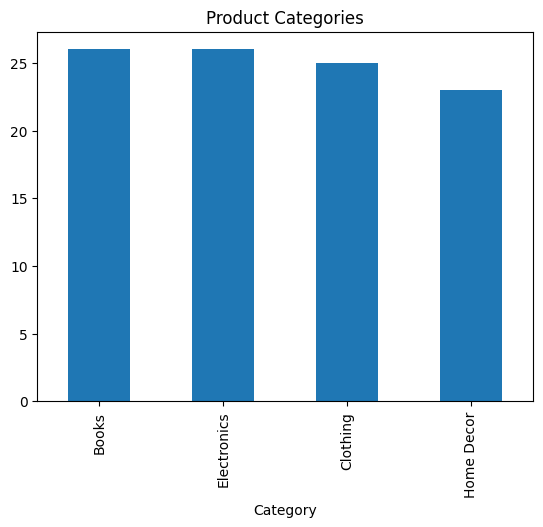

In [9]:
#  Products
products.describe()
products['Category'].value_counts().plot(kind='bar', title='Product Categories')
plt.show()

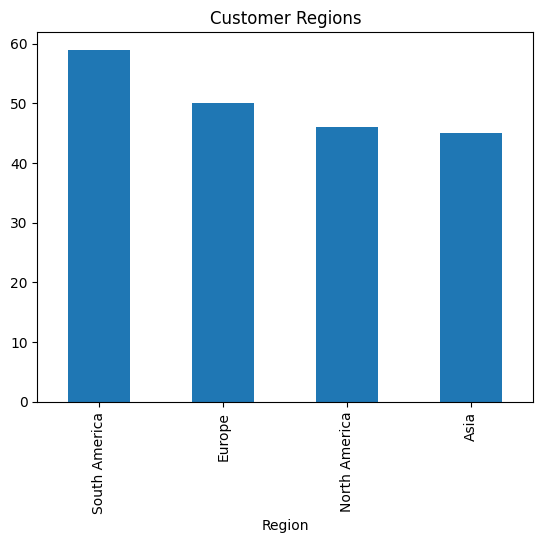

In [10]:
#  Customers
customers['Region'].value_counts().plot(kind='bar', title='Customer Regions')
plt.show()

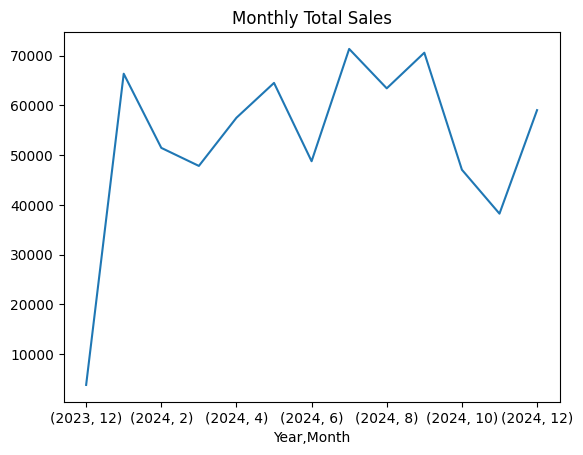

In [11]:
import matplotlib.pyplot as plt

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

monthly_sales = transactions.groupby(['Year', 'Month'])['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Total Sales')
plt.show()


In [12]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Year,Month,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024,10,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024,6,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024,4,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024,9,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [13]:
# Check for missing values
missing_values = merged_data.isnull().sum()
missing_values

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
Year               0
Month              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [14]:
merged_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Year', 'Month', 'CustomerName',
       'Region', 'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [15]:
# Check for duplicates
duplicates = merged_data.duplicated().sum()
duplicates

0

In [16]:
# Check data types
data_types = merged_data.dtypes
data_types

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price_x                   float64
Year                        int32
Month                       int32
CustomerName               object
Region                     object
SignupDate                 object
ProductName                object
Category                   object
Price_y                   float64
dtype: object

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers in numerical columns
numerical_columns = ['Quantity', 'TotalValue', 'Price_x', 'Price_y']

# Plot boxplots for each numerical column
outlier_plots = {}
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=merged_data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.savefig(f'{column}_boxplot.png')
    plt.close()

# Summary statistics for numerical columns
summary_statistics = merged_data[numerical_columns].describe()
summary_statistics

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [18]:
# Evaluate categorical variables for consistency
categorical_columns = ['TransactionID', 'CustomerID', 'ProductID', 'CustomerName', 'Region', 'ProductName', 'Category']

# Check unique values in each categorical column
unique_values = {col: merged_data[col].nunique() for col in categorical_columns}

# Check for inconsistencies in 'Region' and 'Category'
region_values = merged_data['Region'].unique()
category_values = merged_data['Category'].unique()

unique_values, region_values, category_values

({'TransactionID': 1000,
  'CustomerID': 199,
  'ProductID': 100,
  'CustomerName': 199,
  'Region': 4,
  'ProductName': 66,
  'Category': 4},
 array(['Europe', 'Asia', 'South America', 'North America'], dtype=object),
 array(['Electronics', 'Clothing', 'Books', 'Home Decor'], dtype=object))

C:\Users\Chethana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


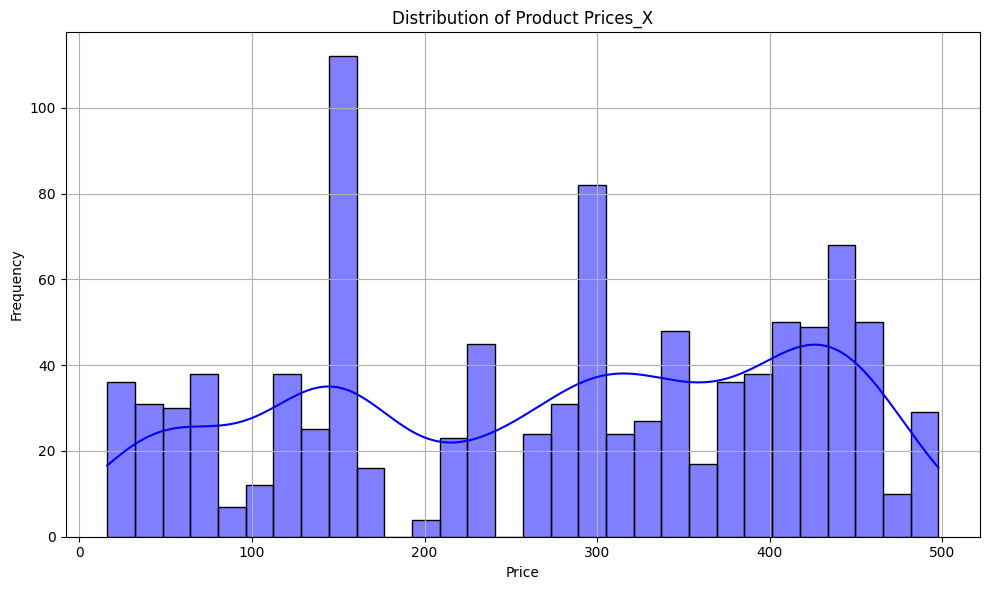

In [19]:
# Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Price_x'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices_X')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\Chethana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


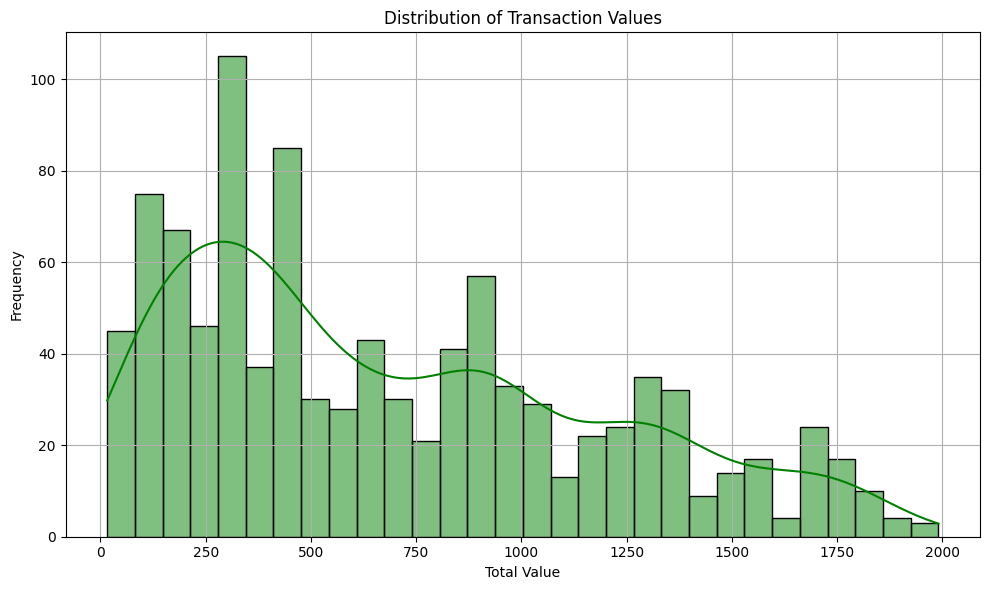

In [20]:
# Distribution of Transaction Values
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], bins=30, kde=True, color='green')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

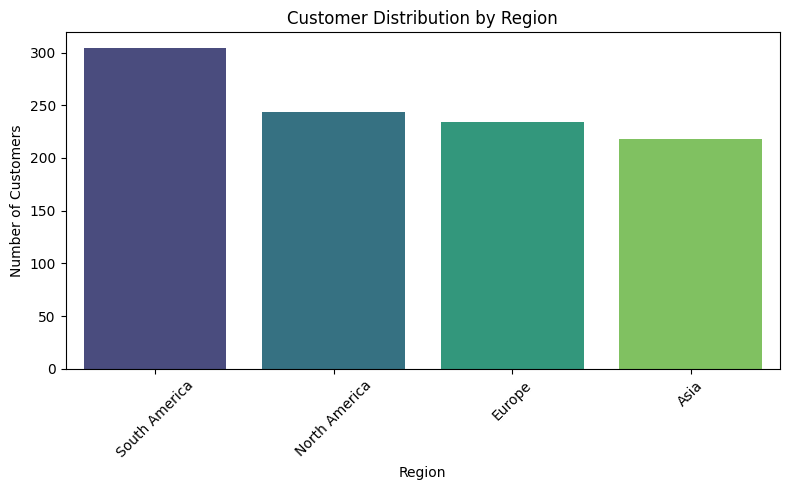

In [21]:
# Distribution of Customer Regions
region_counts = merged_data['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Calculate the correlation matrix for numerical features
correlation_matrix = merged_data[['Price_x', 'TotalValue', 'Quantity']].corr()
correlation_matrix

,Price_x,TotalValue,Quantity
Price_x,1.000000,0.722714,-0.009378
TotalValue,0.722714,1.000000,0.609972
Quantity,-0.009378,0.609972,1.000000


In [23]:
# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Price_x  TotalValue  Quantity
Price_x     1.000000    0.722714 -0.009378
TotalValue  0.722714    1.000000  0.609972
Quantity   -0.009378    0.609972  1.000000


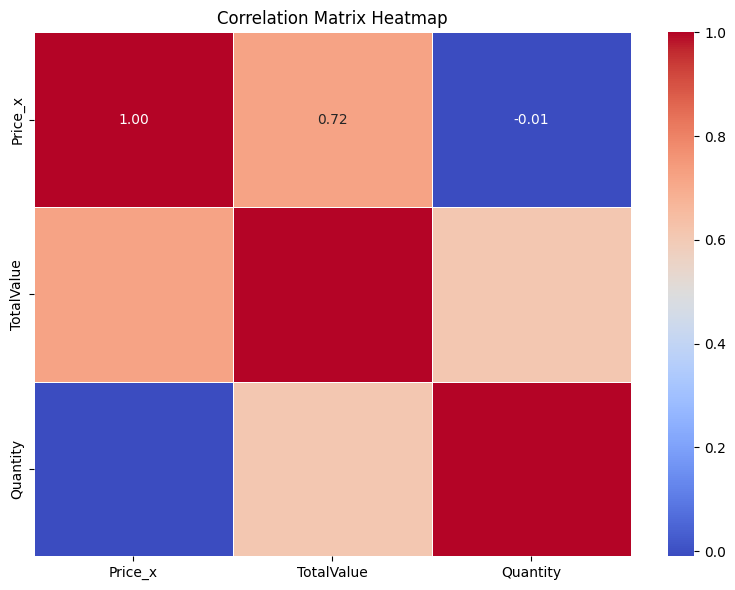

In [24]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


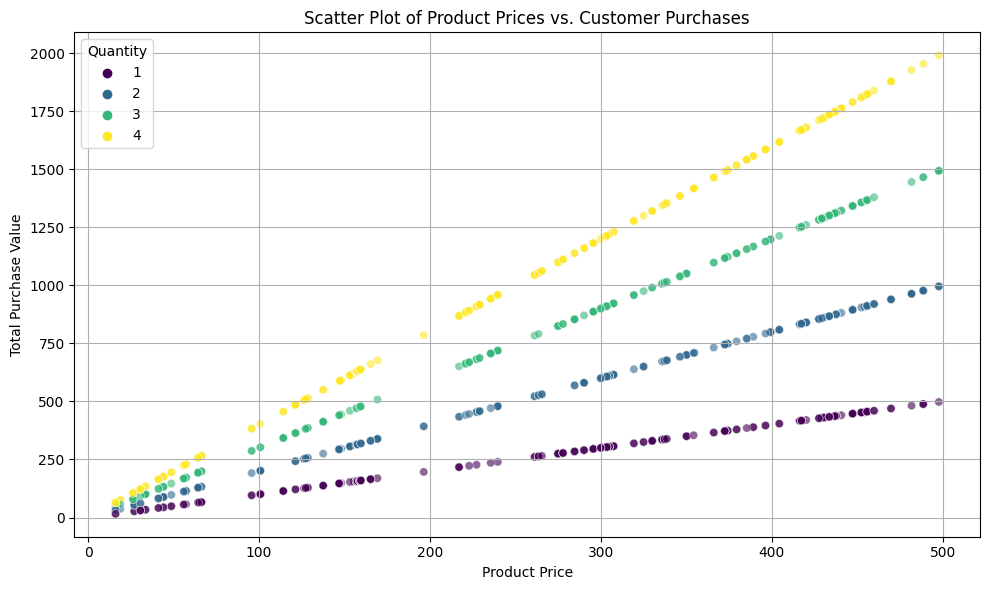

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Price_x', y='TotalValue', hue='Quantity', alpha=0.6, palette='viridis')
plt.title('Scatter Plot of Product Prices vs. Customer Purchases')
plt.xlabel('Product Price')
plt.ylabel('Total Purchase Value')
plt.grid()
plt.tight_layout()
plt.show()


In [26]:
contingency_table = pd.crosstab(merged_data['Category'], merged_data['Region'])
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
Region       Asia  Europe  North America  South America
Category                                               
Books          51      64             65             90
Clothing       58      47             60             63
Electronics    57      58             60             79
Home Decor     52      65             59             72


In [27]:
# Perform Chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")



Chi-squared Test Statistic: 6.187534151639927
P-value: 0.721012257897643


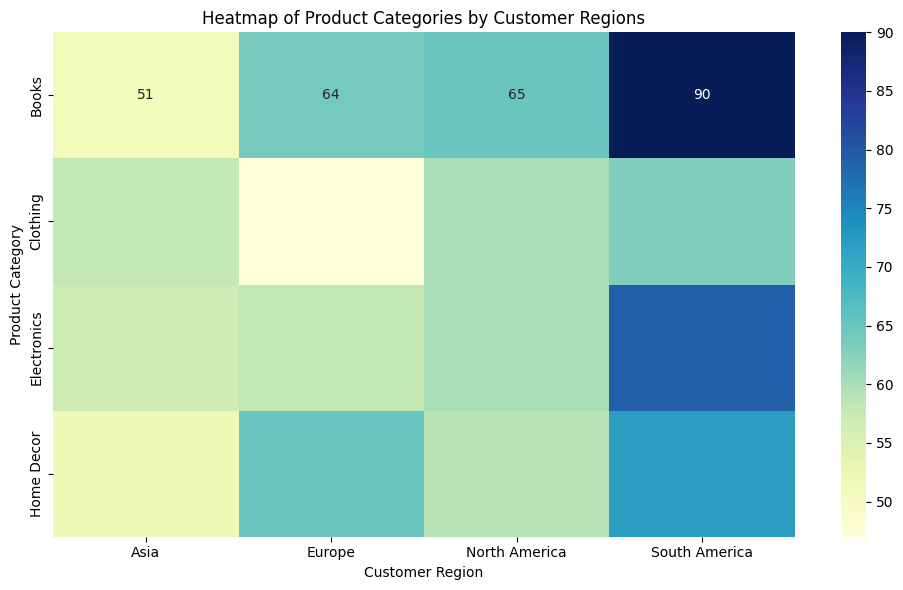

In [28]:
# Visualize the contingency table using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Product Categories by Customer Regions')
plt.xlabel('Customer Region')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

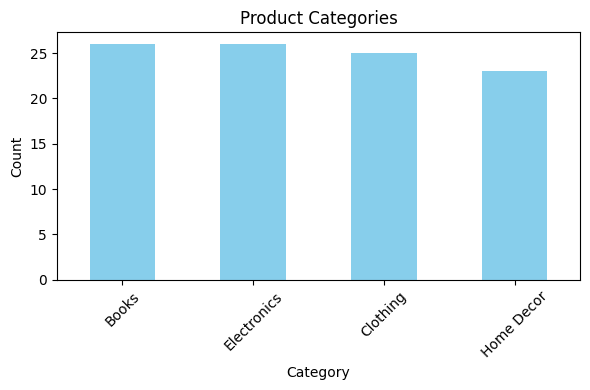

In [29]:
# EDA: Product Categories Distribution
category_counts = products['Category'].value_counts()
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Product Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

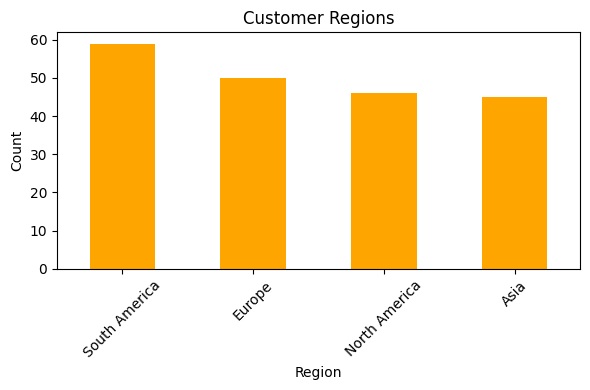

In [30]:
# EDA: Customer Regions Distribution
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(6, 4))
region_counts.plot(kind='bar', color='orange')
plt.title('Customer Regions')
plt.ylabel('Count')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

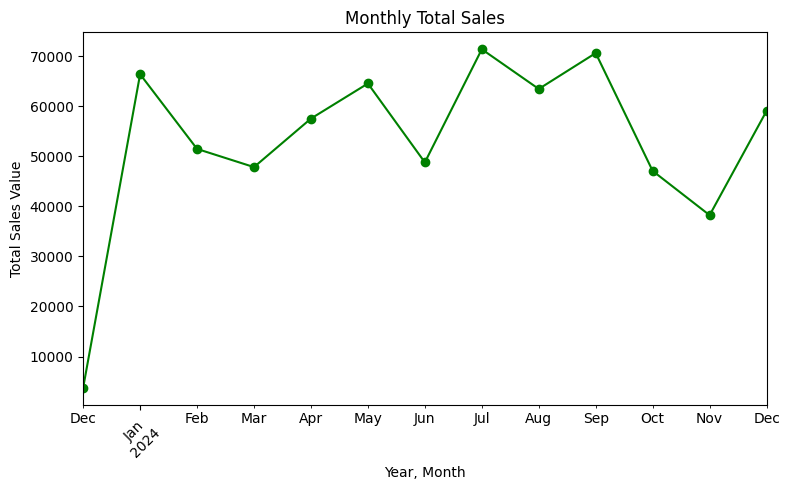

In [31]:
# EDA: Monthly Sales Trend
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Total Sales')
plt.ylabel('Total Sales Value')
plt.xlabel('Year, Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

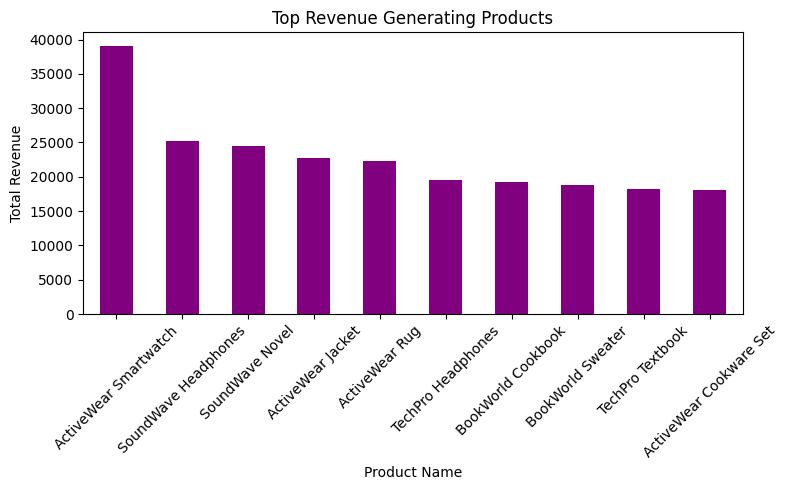

In [32]:
# EDA: Top Revenue Generating Products
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='purple')
plt.title('Top Revenue Generating Products')
plt.ylabel('Total Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

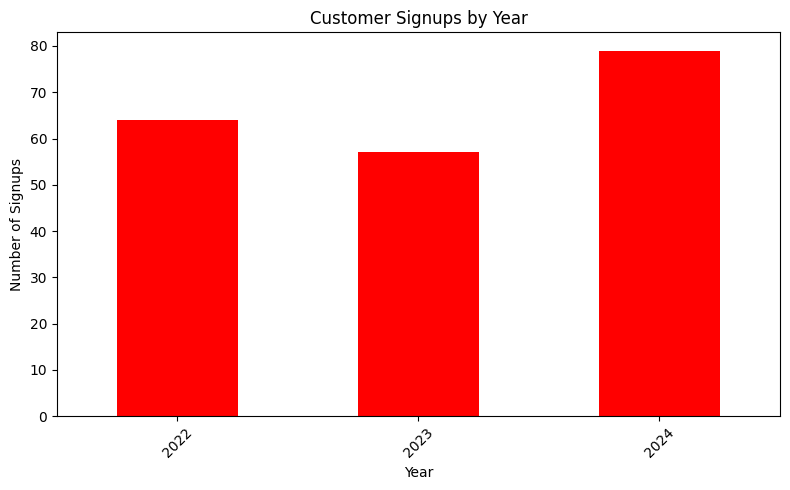

In [33]:
# EDA: Signup Year Analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_year_counts = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
signup_year_counts.plot(kind='bar', color='red')
plt.title('Customer Signups by Year')
plt.ylabel('Number of Signups')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:

# Insight 1: Most popular product categories
popular_categories = products['Category'].value_counts().idxmax()

# Insight 2: Region with the highest number of customers
region_with_most_customers = customers['Region'].value_counts().idxmax()

# Insight 3: Month with the highest sales
monthly_sales 
month_with_highest_sales = monthly_sales.idxmax()

# Insight 4: Average transaction value
average_transaction_value = transactions['TotalValue'].mean()

# Insight 5: Most frequently purchased product
most_frequent_product = transactions['ProductID'].value_counts().idxmax()

insights = {
    '1. popular_categories': popular_categories,
    '2. region_with_most_customers': region_with_most_customers,
    '3. month_with_highest_sales': month_with_highest_sales,
    '4. average_transaction_value': average_transaction_value,
    '5. most_frequent_product': most_frequent_product
}
insights

{'1. popular_categories': 'Books',
 '2. region_with_most_customers': 'South America',
 '3. month_with_highest_sales': Period('2024-07', 'M'),
 '4. average_transaction_value': 689.9955600000001,
 '5. most_frequent_product': 'P059'}